# Apply stippling to hazard maps
This uses contourf hatches

In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
%%time

from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm

regions = regions_dict['ncra_regions']

CPU times: user 14.5 s, sys: 1.25 s, total: 15.7 s
Wall time: 16.9 s


# Apply stippling to single figure
The stippling mask must be a boolean mask with lat and lon.


In [3]:
%%time

filename = "/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/\
HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc"
ds = xr.open_dataset(filename)
var = "HWAtx"

# the stippling mask needs to be a boolean mask with lat and lon
# here is a simple mask that shows stippling for all values greater than 42C
stippling_mask = ds[var]>42
stippling_mask



CPU times: user 3.9 s, sys: 1.59 s, total: 5.49 s
Wall time: 8.09 s


<xarray.DataArray 'HWAtx' (lat: 691, lon: 886)> Size: 612kB
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * lat       (lat) float64 6kB -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon       (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
    quantile  float64 8B ...

CPU times: user 25.8 s, sys: 81.2 ms, total: 25.9 s
Wall time: 26.1 s


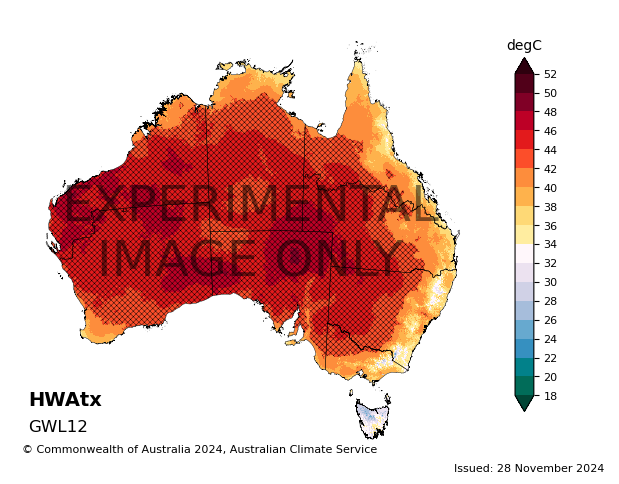

In [4]:
%%time
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm

regions = regions_dict['ncra_regions']

filename = "/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/\
HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc"
ds = xr.open_dataset(filename)
var = "HWAtx"

# the stippling mask needs to be a boolean mask with lat and lon
# here is a simple mask that shows stippling for all values greater than 42C
stippling_mask = ds[var]>42

regions = regions_dict['ncra_regions']

plot_acs_hazard(data = ds[var],
                stippling=stippling_mask,
                regions = regions_dict['ncra_regions'],
                title = var,
                date_range = "GWL12",
                cmap = cmap_dict["tasmax"],
                ticks = np.arange(18,53,2),
                cbar_label = "degC",
                cbar_extend = "both",                
                outfile = "figures/FAQ_example_stippling.png",
               watermark_color="none");

# Apply stippling to multi panel plots
Give one stippling mask to each specific keyword. You can specify any or all:
* stippling_gwl12
* stippling_gwl15
* stippling_gwl20
* stippling_gwl30

CPU times: user 42.4 s, sys: 112 ms, total: 42.5 s
Wall time: 43 s


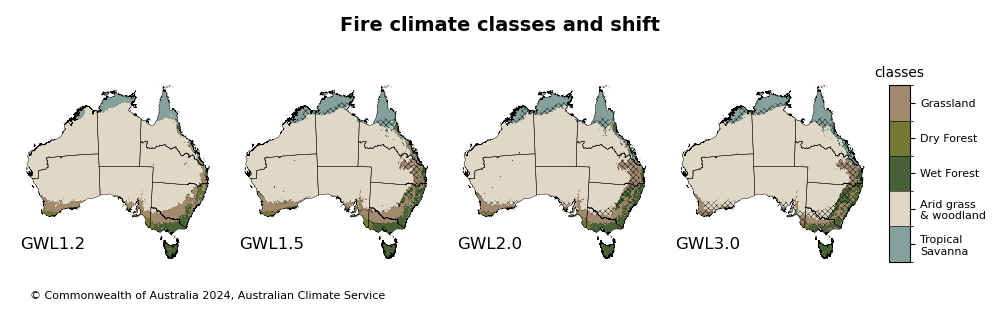

In [5]:
%%time 
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm

regions = regions_dict['ncra_regions']

var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")

# Calculate where the classes have shifted relative to the GWL12 baseline
stippling_gwl15 = (ds_gwl15[var] != ds_gwl12[var])
stippling_gwl20 = (ds_gwl20[var] != ds_gwl12[var])
stippling_gwl30 = (ds_gwl30[var] != ds_gwl12[var])

plot_acs_hazard_4pp(ds_gwl12=ds_gwl12[var],
                    ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    stippling_gwl15=stippling_gwl15,
                    stippling_gwl20=stippling_gwl20,
                    stippling_gwl30=stippling_gwl30,
                    regions = regions,
                    title = "Fire climate classes and shift",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna",
                                   "Arid grass\n& woodland",
                                   "Wet Forest",
                                   "Dry Forest",
                                   "Grassland",],
                    cbar_label = "classes",
                    watermark="",
                    issued_date = "",
                    orientation="horizontal",
                    tick_rotation=0,
                    outfile = "figures/FAQ_example_stippling_contourf_problem.png"
                    );

# Mask resolution
The mask does not need to be on the same grid (the same resolution) as the data to work.

Below you can see that the stippling is coarsened, but the figure remains similar as the one above.

Using coarsen (as below) can overcome some unexpected behaviour with stippling with noisy data.

CPU times: user 12.9 s, sys: 372 ms, total: 13.2 s
Wall time: 13.3 s


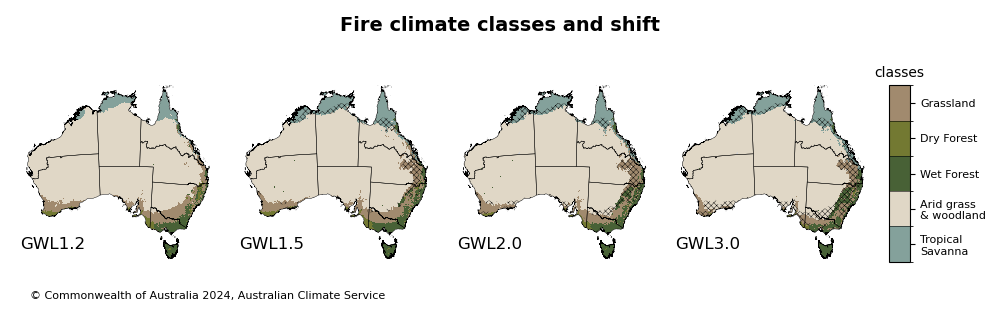

In [6]:
%%time 
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm

regions = regions_dict['ncra_regions']

var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")

# Calculate where the classes have shifted relative to the GWL12 baseline and
# coarsen the stippling to overcome the bug in the contourf hatching which gets confused with the fuzzy edges
# "lat" and "lon" determines how many grids to average together in the coarsening
# the end ">0.5" determines what proportion of the grids must be positive to put stippling in that new coarsened grid. 
# eg ">0.5" mean that more than 50% of the original grids must be True for the coarsened mask to label it as True

coarse_stippling_gwl15 = (ds_gwl15 != ds_gwl12[var])\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
coarse_stippling_gwl20 = (ds_gwl20 != ds_gwl12[var])\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
coarse_stippling_gwl30 = (ds_gwl30 != ds_gwl12[var])\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5

plot_acs_hazard_4pp(ds_gwl12=ds_gwl12[var],
                    ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    stippling_gwl15=coarse_stippling_gwl15,
                    stippling_gwl20=coarse_stippling_gwl20,
                    stippling_gwl30=coarse_stippling_gwl30,
                    regions = regions,
                    title = "Fire climate classes and shift",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna",
                                   "Arid grass\n& woodland",
                                   "Wet Forest",
                                   "Dry Forest",
                                   "Grassland",],
                    cbar_label = "classes",
                    watermark="",
                    issued_date = "",
                    orientation="horizontal",
                    tick_rotation=0,
                    outfile = "figures/FAQ_example_stippling_coarsen.png"
                    );